# A modified version of chisquare_test to use the upgraded version of make_Cmatrix: class CovMatrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import time  # for measuring duration
#import make_Cmatrix as mcm

from CovMatrix import CovMatrix

Initializing with no covariance matrix.


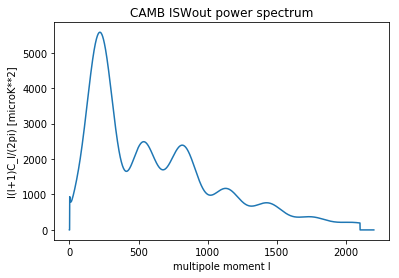

loading C matrix ...
Loaded covariance matrix from file.
starting RD inversion...
time elapsed:  0  minutes
NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
starting trial  1  of  1000
starting trial  2  of  1000
starting trial  3  of  1000
starting trial  4  of  1000
starting trial  5  of  1000
starting trial  6  of  1000
starting trial  7  of  1000
starting trial  8  of  1000
starting trial  9  of  1000
starting trial  10  of  1000
starting trial  11  of  1000
starting trial  12  of  1000
starting trial  13  of  1000
starting trial  14  of  1000
starting trial  15  of  1000
starting trial  16  of  1000
starting trial  17  of  1000
starting trial  18  of  1000
starting trial  19  of  1000
starting trial  20  of  1000
starting trial  21  of  1000
starting trial  22  of  1000
starting trial  23  of  1000
starting trial  24  of  1000
starting trial  25  of  1000
starting trial  26  of  1000
starting trial  27  of  1000
starting trial  28  of  1000


starting trial  277  of  1000
starting trial  278  of  1000
starting trial  279  of  1000
starting trial  280  of  1000
starting trial  281  of  1000
starting trial  282  of  1000
starting trial  283  of  1000
starting trial  284  of  1000
starting trial  285  of  1000
starting trial  286  of  1000
starting trial  287  of  1000
starting trial  288  of  1000
starting trial  289  of  1000
starting trial  290  of  1000
starting trial  291  of  1000
starting trial  292  of  1000
starting trial  293  of  1000
starting trial  294  of  1000
starting trial  295  of  1000
starting trial  296  of  1000
starting trial  297  of  1000
starting trial  298  of  1000
starting trial  299  of  1000
starting trial  300  of  1000
starting trial  301  of  1000
starting trial  302  of  1000
starting trial  303  of  1000
starting trial  304  of  1000
starting trial  305  of  1000
starting trial  306  of  1000
starting trial  307  of  1000
starting trial  308  of  1000
starting trial  309  of  1000
starting t

starting trial  558  of  1000
starting trial  559  of  1000
starting trial  560  of  1000
starting trial  561  of  1000
starting trial  562  of  1000
starting trial  563  of  1000
starting trial  564  of  1000
starting trial  565  of  1000
starting trial  566  of  1000
starting trial  567  of  1000
starting trial  568  of  1000
starting trial  569  of  1000
starting trial  570  of  1000
starting trial  571  of  1000
starting trial  572  of  1000
starting trial  573  of  1000
starting trial  574  of  1000
starting trial  575  of  1000
starting trial  576  of  1000
starting trial  577  of  1000
starting trial  578  of  1000
starting trial  579  of  1000
starting trial  580  of  1000
starting trial  581  of  1000
starting trial  582  of  1000
starting trial  583  of  1000
starting trial  584  of  1000
starting trial  585  of  1000
starting trial  586  of  1000
starting trial  587  of  1000
starting trial  588  of  1000
starting trial  589  of  1000
starting trial  590  of  1000
starting t

starting trial  842  of  1000
starting trial  843  of  1000
starting trial  844  of  1000
starting trial  845  of  1000
starting trial  846  of  1000
starting trial  847  of  1000
starting trial  848  of  1000
starting trial  849  of  1000
starting trial  850  of  1000
starting trial  851  of  1000
starting trial  852  of  1000
starting trial  853  of  1000
starting trial  854  of  1000
starting trial  855  of  1000
starting trial  856  of  1000
starting trial  857  of  1000
starting trial  858  of  1000
starting trial  859  of  1000
starting trial  860  of  1000
starting trial  861  of  1000
starting trial  862  of  1000
starting trial  863  of  1000
starting trial  864  of  1000
starting trial  865  of  1000
starting trial  866  of  1000
starting trial  867  of  1000
starting trial  868  of  1000
starting trial  869  of  1000
starting trial  870  of  1000
starting trial  871  of  1000
starting trial  872  of  1000
starting trial  873  of  1000
starting trial  874  of  1000
starting t

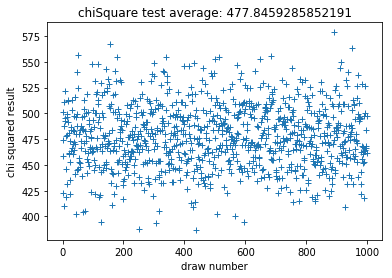

In [3]:
# test function copied from chisquare_test
# Modifeid to use CovMatrix instead of make_Cmatrix

def test(case = 10,nTrials=1000,useInverse=True,nested=False,newMatrix=False,useRD=False,useCho=False):
    """
        function for testing the expectation value <T*C**-1*T> = N_pix
        Inputs:
            case: selects which set of files to use for test
                Default: 10
            nTrials: the number of random skies to use
                Default: 1000
            useInverse: set this to True to do matrix inversion, False to use left/right inverses method
                Default: True
            nested: NESTED vs RING parameter for healpy functions
                Default: False
            newMatrix: set to True to create new matrices
                Default: False
            useRD: set to True to use RD eigendecomposition for inverse
                Overrides other methods
                If useRD and useCho are both False, then LU decomposition will be used.
                Default: False
            useCho: set to True to use Cholesky decomposiiton for inverse
                If useRD and useCho are both False, then LU decomposition will be used.
                Default: False
            
    """
    # make ininitialized CovMatrix to access member functions
    emptyCovMat = CovMatrix()
    
    # get Cl
    ISWoutFile = 'ISWout_scalCls.fits'
    ell, temps = emptyCovMat.getCl(ISWoutFile) # temps has units K**2

    # show Cl
    emptyCovMat.showCl(ell,temps)

    # dictionary of sets of file names
    PSG = '/Data/PSG/'
    fileSets = {
    100:(PSG+'ten_point/ISWmask_din1_R010.fits','covar6110_R010_nhp.npy','invCovar_R010_nhp.npy'), #LU; lmax250, with BW
    101:(PSG+'ten_point/ISWmask_din1_R010.fits','covar6110_R010_nhp.npy','invCovar_R010_RD.npy'), #RD; lmax250, with BW
    102:(PSG+'ten_point/ISWmask_din1_R010.fits','covar6110_R010_nhp.npy','invCovar_R010_cho.npy'), #cho; lmax250, with BW
    1:(PSG+'small_masks/ISWmask_din1_R010_trunc1000.fits','covar1000b.npy','invCovar1000b.npy'), #lmax250
    2:(PSG+'small_masks/ISWmask_din1_R010_trunc1000.fits','covar1000c.npy','invCovar1000c.npy'), #lmax2000
    3:(PSG+'small_masks/ISWmask_din1_R010_trunc1000.fits','covar1000d.npy','invCovar1000d.npy'), #lmax250, with W
    4:(PSG+'small_masks/ISWmask_din1_R010_trunc1000.fits','covar1000e.npy','invCovar1000e.npy'), #lmax250, with B
    5:(PSG+'small_masks/ISWmask_din1_R010_trunc1000.fits','covar1000f.npy','invCovar1000f.npy'), #lmax250, no BW
    7:(PSG+'small_masks/ISWmask_din1_R060_trunc1.fits','covar478a.npy','invCovar478a.npy'), #lmax2000, no BW
    8:(PSG+'small_masks/ISWmask_din1_R060_trunc2.fits','covar525a.npy','invCovar525a.npy'), #lmax2000, no BW
    9:(PSG+'small_masks/ISWmask_din1_R060_trunc3.fits','covar500a.npy','invCovar500a.npy'), #lmax2000, no BW
    10:(PSG+'small_masks/ISWmask_din1_R060_trunc1.fits','covar478b.npy','invCovar478b.npy'), #lmax250, no BW
    11:(PSG+'small_masks/ISWmask_din1_R060_trunc2.fits','covar525b.npy','invCovar525b.npy'), #lmax250, no BW
    12:(PSG+'small_masks/ISWmask_din1_R060_trunc3.fits','covar500b.npy','invCovar500b.npy'), #lmax250, no BW
    13:(PSG+'small_masks/ISWmask_din1_R060_trunc1.fits','covar478c.npy','invCovar478c.npy'), #lmax250, with B
    14:(PSG+'small_masks/ISWmask_din1_R060_trunc2.fits','covar525c.npy','invCovar525c.npy'), #lmax250, with B
    15:(PSG+'small_masks/ISWmask_din1_R060_trunc3.fits','covar500c.npy','invCovar500c.npy'), #lmax250, with B
    16:(PSG+'small_masks/ISWmask_din1_R060_trunc1.fits','covar478d.npy','invCovar478d.npy'), #lmax250, no B, with W
    17:(PSG+'small_masks/ISWmask_din1_R060_trunc2.fits','covar525d.npy','invCovar525d.npy'), #lmax250, no B, with W
    18:(PSG+'small_masks/ISWmask_din1_R060_trunc3.fits','covar500d.npy','invCovar500d.npy'), #lmax250, no B, with W
    19:(PSG+'small_masks/ISWmask_din1_R060_trunc1.fits','covar478e.npy','invCovar478e.npy'), #lmax250, with BW
    20:(PSG+'small_masks/ISWmask_din1_R060_trunc2.fits','covar525e.npy','invCovar525e.npy'), #lmax250, with BW
    21:(PSG+'small_masks/ISWmask_din1_R060_trunc3.fits','covar500e.npy','invCovar500e.npy') #lmax250, with BW
    }

    BWcontrol = {
        102:(True,True),
        10:(False,False),
        11:(False,False),
        12:(False,False),
        13:(True,False),
        14:(True,False),
        15:(True,False),
        16:(False,True),
        17:(False,True),
        18:(False,True),
        19:(True,True),
        20:(True,True),
        21:(True,True)
    }


    #case = 0
    maskFile,saveMatrixFile,saveInvCMFile = fileSets.get(case)
    doBeamSmooth,doPixWin = BWcontrol.get(case)

    useMicro = False
    #useRD = False#True # overrides useCho
    #useCho = True # overrides default: use LU
    if newMatrix:
        startTime = time.time()
        #print 'starting C matrix creation...'
        #covMat = CovMatrix(maskFile=maskFile, powerFile=ISWoutFile, highpass=0, beamSmooth=doBeamSmooth,
        #                   pixWin=doPixWin, lmax=250, useMicro=useMicro)
        #covMat.covSave(saveMatrixFile)
        # or load one
        print 'loading C matrix ...'
        covMat = CovMatrix(loadFile=saveMatrixFile, maskFile=maskFile, powerFile=ISWoutFile, 
                           highpass=0, beamSmooth=doBeamSmooth,
                           pixWin=doPixWin, lmax=250, useMicro=useMicro)
        
        if useInverse:
            if useRD:
                #print 'starting eigen decomposition...'
                #w, v = np.linalg.eigh(covMat)
                print 'starting RD inversion...'
                #invCMat = mcm.RDInvert(w, v)
                covMat.RDInvert()
            elif useCho:
                print 'starting Cholesky inversion...'
                #invCMat = mcm.choInvert(covMat)
                covMat.choInvert()
            else: # use LU
                print 'starting LU inversion...'
                #invCMat = np.linalg.inv(covMat)
                covMat.LUInvert()
                
            invCMat = covMat.getInvMat()
            print 'time elapsed: ', int((time.time() - startTime) / 60), ' minutes'
            #np.save(saveInvCMFile, invCMat)
            covMat.invSave(saveFile=saveInvCMFile)
    else:
        covMat = CovMatrix(loadFile=saveMatrixFile, maskFile=maskFile, powerFile=ISWoutFile, 
                           highpass=0, beamSmooth=doBeamSmooth,
                           pixWin=doPixWin, lmax=250, useMicro=useMicro)
        
        if useInverse:
            #invCMat = np.load(saveInvCMFile)
            covMat.invLoad(loadFile=saveInvCMFile)
        #else:
        #    covMat = mcm.symLoad(saveMatrixFile)

    # load the mask
    mask = hp.read_map(maskFile, nest=nested)

    # apply gaussbeam before synfast?
    #lmax = 250
    #Wpix = hp.pixwin(64)
    #W_l = Wpix[:lmax+1]
    #mbeam = hp.gauss_beam(120./60*np.pi/180,lmax=lmax) # 120 arcmin to be below W_l
    #B_l = mbeam[:lmax+1]
    #temps = temps[:lmax+1]*B_l**2 #*W_l**2

    #nTrials = 1000
    NSIDE=64
    lmax=250
    fwhmMin = 120.
    fwhmRad = fwhmMin/60.*np.pi/180.

    chiSqResults = np.zeros(nTrials)
    for trial in range(nTrials):
        print 'starting trial ',trial+1,' of ',nTrials
        if doBeamSmooth:
            if doPixWin:
                map = hp.synfast(temps, NSIDE, lmax=lmax, fwhm=fwhmRad, pixwin=True, verbose=False)
            else:
                map = hp.synfast(temps, NSIDE, lmax=lmax, fwhm=fwhmRad, verbose=False)
        else:
            if doPixWin:
                map = hp.synfast(temps, NSIDE, lmax=lmax, pixwin=True, verbose=False)
            else:
                map = hp.synfast(temps, NSIDE, lmax=lmax, verbose=False)
        if nested:
            map = hp.reorder(map,r2n=True)
        Tvec = map[np.where(mask)] #apply mask
        if useMicro:
            Tvec = Tvec*1e6 #convert K to microK
        if useInverse:
            chiSqResults[trial] = np.dot(Tvec,np.dot(invCMat,Tvec))
            #cInvT_test(invCMat,Tvec)
        else:
            chiSqResults[trial] = np.dot(Tvec,cInvT(covMat,Tvec))
    csqMean = np.mean(chiSqResults)
    print 'average of chiSquared results: ',csqMean
    plt.plot(chiSqResults,linestyle="none",marker='+')
    plt.title('chiSquare test average: '+str(csqMean))
    plt.xlabel('draw number')
    plt.ylabel('chi squared result')
    plt.show()
    
    
    
# run the test for each inversion method
#test(newMatrix=True,useRD=False,useCho=False)
#test(newMatrix=True,useRD=False,useCho=True )
test(newMatrix=True,useRD=True, useCho=False)